# Условная минимизация

## Многоугольник с вершинами (0, 0), (0, 4), (5, 8), (10, 4), (6, 0). Функция $f(x) = x_1^2 +x_2^2-4x_1 - 6x_2$

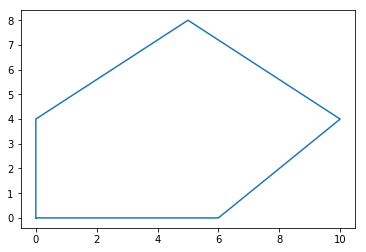

In [21]:
from matplotlib.pyplot import plot
%matplotlib inline
plot([0, 6, 10,5,  0, 0], [0, 0, 4, 8, 4, 0])

### Метод внешних штрафов

In [1]:
import numpy as np

In [2]:
def f(x):
    return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1]
def g1(x):
    return -x[0]
def g2(x):
    return -x[1]
def g3(x):
    return x[1] - 0.8*x[0] - 4
def g4(x):
    return x[1] + 0.8*x[0] - 12
def g5(x):
    return x[0] - x[1] - 6

In [50]:
a, b, eps = 1.5, 2, 0.05
def passive_search(f, x, r, grad, a = a, b = b, eps = eps):
    print("\n Passive")
    n = round((b-a)/eps)+1
    x_s = [a+i*eps for i in range(n)]
    y_s = [f(x-i*grad, r) for i in x_s]
    res = y_s.index(min(y_s))
    print('res', res)
    print('y in mim', y_s[res])
    return x_s[res]


In [51]:
# # from optimization_methods import passive_search
# a, b, eps = 0.0001, 0.9999,  0.005
# def grad_descent_series(x = np.array([0, 0]), grad= None, epsilon = 0.05):
# #     grad = grad_f(x)
#     n = 0
#     check = 0
#     while np.linalg.norm(grad) > epsilon or check < 3:
#         alp = passive_search(f, x, grad, a, b, eps)
#         x = x - alp*grad
#         grad = grad_f(x)
#         n+=1
#         if (np.linalg.norm(grad) <= epsilon): check +=1
#     print("Метод наискорейшего градиентного спуска выполнил {} шагов".format(n))
#     print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
#     return x

In [52]:
def H(x):
#     print(g1(x),g2(x),g3(x),g4(x),g5(x))
    return max([0, g1(x)])**2 + max([0, g2(x)])**2 + max([0, g3(x)])**2 + max([0, g4(x)])**2 + max([0, g5(x)])**2   
def phi(x, r):
    return f(x)+r*H(x)
def d_phi(x, r):
    a = 2*x[0] + r*(2 * max([0, g1(x)])*(-1) + 2 * max([0, g3(x)])*(-0.8) + 2 * max([0, g4(x)])*(0.8) + 2 * max([0, g5(x)])) 
    b = 2*x[1] + r*(2 * max([0, g2(x)])*(-1) + 2 * max([0, g3(x)]) + 2 * max([0, g4(x)]) + 2 * max([0, g5(x)])*(-1))
    return np.array([a, b])

In [53]:
def penalty(f = f, x = np.array([-1, -2]), r = 1, eps = 1, epsilon = 0.1):
    n = 0
    check = 0
#     print(H(x))
    while H(x) > eps:
        print("h", H(x))
        x = np.array([4, 3])
        while np.linalg.norm(d_phi(x, r)) > epsilon/10:
            print("\nМНГС")
            alp = passive_search(phi, x,r, d_phi(x, r), -2, 2, epsilon/100)
            print('phi', phi(x, r))
            print('d_phi', d_phi(x, r))
            print('alp ', alp)
            x = x - alp*d_phi(x, r)
            print('x=', x)
            print('f=', f(x))
            print('d_phi', d_phi(x, r))
            print("h in x: ", H(x))
            if not alp:
                break
        print("h end", H(x))
        r*=10
    return x

In [54]:
%time
penalty()

Wall time: 0 ns
h 5

МНГС

 Passive
res 2160
y in mim -11.56
phi -9
d_phi [8. 6.]
alp  0.16000000000000014
x= [2.72 2.04]
f= -11.56
d_phi [5.44 4.08]
h in x:  0

МНГС

 Passive
res 2000
y in mim -11.56
phi -11.56
d_phi [5.44 4.08]
alp  0.0
x= [2.72 2.04]
f= -11.56
d_phi [5.44 4.08]
h in x:  0
h end 0


array([2.72, 2.04])